# Do teams with cat mascots or teams with dog mascots cause more upsets?



## Step 1

### A "cat" is any member of the biological family [Felidae](https://en.wikipedia.org/wiki/Felidae). To find out how many upsets cat mascots have caused, you need to sum up upsets by mascot taxonomic Family.

In [0]:
from pandas.io import gbq
project_id = '[YOUR_PROJECT_ID]'

import matplotlib.pyplot as plt

In [4]:
families_q = """
SELECT
  tax_family,
  COUNT(win_team_id) AS num_upsets
FROM
  `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games` games
JOIN
  `bigquery-public-data.ncaa_basketball.mascots` mascots
ON
  games.win_team_id=mascots.id
WHERE
  CAST(win_seed AS INT64) > CAST(lose_seed AS INT64)
GROUP BY
  tax_family
ORDER BY
  num_upsets
DESC
"""

families = gbq.read_gbq(query=families_q, dialect ='standard', project_id=project_id)
families.head(50)

Requesting query... ok.
Job ID: job_4oGprlObXpTeLrCqIv53vczezVFc
Query running...
Query done.
Cache hit.

Retrieving results...
Got 28 rows.

Total time taken 1.1 s.
Finished at 2018-03-05 14:36:11.


,tax_family,num_upsets
0,Hominidae,123
1,Felidae,97
2,Canidae,87
3,None,72
4,Accipitridae,36
5,Bovidae,34
6,Ursidae,24
7,Cardinalidae,17
8,Rutaceae,11
9,Mustelidae,8


## Step 2

### But, a "dog" isn't any creature in Canidae - it's [*Canis lupus familiaris*](https://en.wikipedia.org/wiki/Dog). To find upsets by dogs, we need to separate Canis lupus familiaris from other canines within the Canidae family.

In [7]:
family_w_dogs_q = """
WITH tax_upsets AS(
SELECT
  tax_subspecies,
  tax_species,
  tax_family,
  COUNT(win_team_id) AS num_upsets
FROM
  `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games` games
JOIN
  `bigquery-public-data.ncaa_basketball.mascots` mascots
ON
  games.win_team_id=mascots.id
WHERE
  CAST(win_seed AS INT64) > CAST(lose_seed AS INT64)
GROUP BY
  tax_subspecies,
  tax_species,
  tax_family
)
SELECT
 IF(tax_family IS NOT NULL,IF(tax_family='Canidae',IF(tax_subspecies='familiaris',
  'Canidae Canis lupus familiaris','Canidae except Canis lupus familiaris'),tax_family),'No taxonomic family') AS tax_group,
 SUM(num_upsets) AS num_upsets_group
FROM tax_upsets
GROUP BY tax_group
ORDER BY num_upsets_group DESC
"""

family_w_dogs = gbq.read_gbq(query=family_w_dogs_q, dialect ='standard', project_id=project_id)
family_w_dogs.head(50)

Requesting query... ok.
Job ID: job_CruZvJyTbJ6yx2vOjlmk6sSlQAAP
Query running...
Query done.
Processed: 114.2 KB
Standard price: $0.00 USD

Retrieving results...
Got 29 rows.

Total time taken 3.09 s.
Finished at 2018-03-06 10:57:33.


,tax_group,num_upsets_group
0,Hominidae,123
1,Felidae,97
2,No taxonomic family,72
3,Canidae Canis lupus familiaris,65
4,Accipitridae,36
5,Bovidae,34
6,Ursidae,24
7,Canidae except Canis lupus familiaris,22
8,Cardinalidae,17
9,Rutaceae,11


## Step 3

### Everything is better with a visualization...

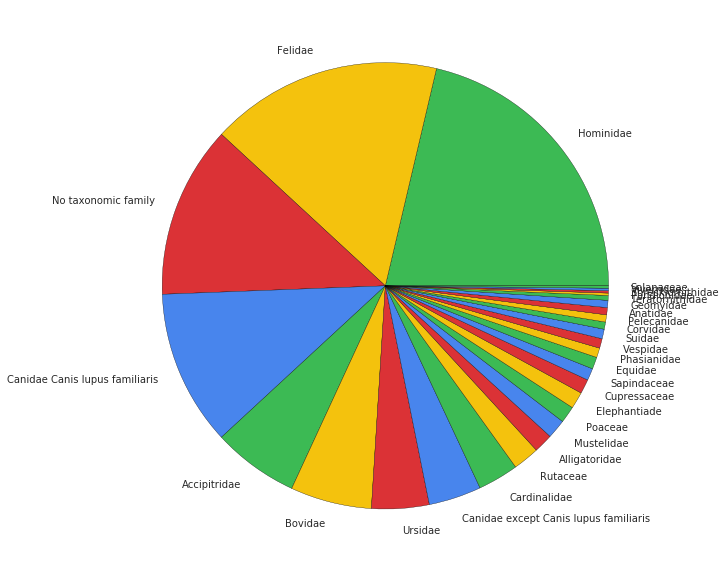

In [8]:
colors = ["#3cba54","#f4c20d","#db3236","#4885ed"]
plt.figure(figsize=(10,10))
plt.pie(family_w_dogs.num_upsets_group, labels=family_w_dogs.tax_group, colors=colors);

## Step 4

### Not all teams have a mascot that can be categorized by biological family. ([Pepperdine is a good example](https://www.google.com/search?biw=1024&bih=1039&tbm=isch&sa=1&ei=7c-dWpbGI4vIjwS9tpnwCw&q=pepperdine+willie+the+wave+mascot&oq=pepperdine+willie+the+wave+mascot&gs_l=psy-ab.3...5808.7035.0.7501.11.11.0.0.0.0.143.1064.7j4.11.0....0...1c.1.64.psy-ab..4.3.256...0i13k1.0.qiJ13wkamxA).) But for D1 teams with mascots that *can* be categorized that way, how many mascots fit into each family?

Requesting query... ok.
Job ID: job_DuBk6p9UgLamJgyIY31dD_l3Hde8
Query running...
Query done.
Cache hit.

Retrieving results...
Got 43 rows.

Total time taken 0.65 s.
Finished at 2018-03-05 15:20:44.


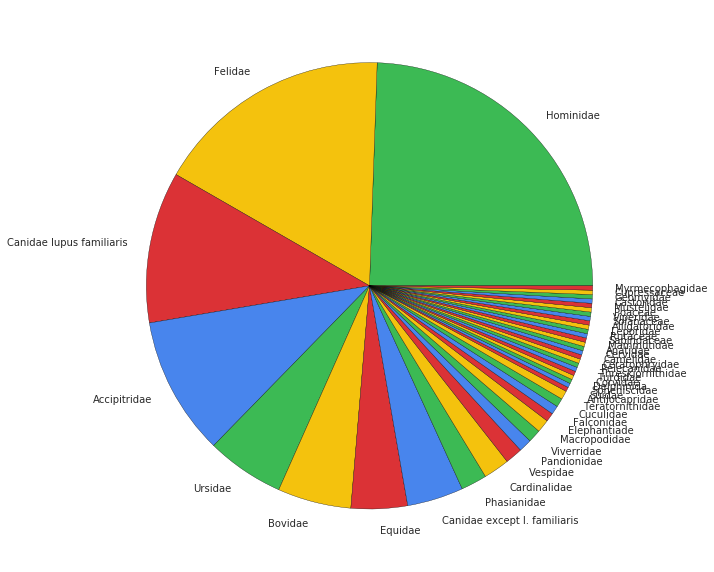

In [22]:
mascots_q = """
SELECT 
 IF(tax_family='Canidae',IF(tax_subspecies='familiaris','Canidae lupus familiaris','Canidae except l. familiaris'),tax_family) AS tax_group,
 COUNT(id) AS num_mascots
FROM `bigquery-public-data.ncaa_basketball.mascots` 
WHERE tax_family IS NOT NULL
GROUP BY tax_group
ORDER BY num_mascots DESC
"""

mascots = gbq.read_gbq(query=mascots_q, dialect ='standard', project_id=project_id)
plt.figure(figsize=(10,10))
plt.pie(mascots.num_mascots, labels=mascots.tax_group, colors=colors);

## Step 5

### Which teams have caused the most tournament upsets?

In [34]:
upsets_q = """
SELECT
  mascots.market AS team,
  win_name,
  mascot_common_name,
  tax_subspecies,
  tax_species,
  tax_family,
  COUNT(win_team_id) AS num_upsets
FROM
  `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games` games
JOIN
  `bigquery-public-data.ncaa_basketball.mascots` mascots
ON
  games.win_team_id=mascots.id
WHERE
  CAST(win_seed AS INT64) > CAST(lose_seed AS INT64)
GROUP BY
  mascots.market,
  win_name,
  mascot_common_name,
  tax_subspecies,
  tax_species,
  tax_family
ORDER BY
  num_upsets
DESC
LIMIT 20
"""

upsets = gbq.read_gbq(query=upsets_q, dialect ='standard', project_id=project_id)
upsets

Requesting query... ok.
Job ID: job_o6F0_s5M4rmQfDlR1AkKblxJ8zdg
Query running...
Query done.
Processed: 142.8 KB
Standard price: $0.00 USD

Retrieving results...
Got 20 rows.

Total time taken 1.7 s.
Finished at 2018-03-05 15:27:46.


,team,win_name,mascot_common_name,tax_subspecies,tax_species,tax_family,num_upsets
0,Villanova,Wildcats,Wildcat,None,silvestris,Felidae,15
1,Michigan State,Spartans,Human,None,sapiens,Hominidae,15
2,Xavier,Musketeers,Human,None,sapiens,Hominidae,12
3,Syracuse,Orange,Orange,None,None,Rutaceae,11
4,Arizona,Wildcats,Wildcat,None,silvestris,Felidae,10
5,Temple,Owls,Owls,None,None,None,10
6,Gonzaga,Bulldogs,Domestic dog,familiaris,lupus,Canidae,10
7,Michigan,Wolverines,Wolf,None,lupus,Canidae,10
8,Butler,Bulldogs,Domestic dog,familiaris,lupus,Canidae,10
9,Connecticut,Huskies,Domestic dog,familiaris,lupus,Canidae,10


## Not only do cat mascots cause more upsets than dog mascots, but one cat team is currently tied at the top for most tournament upsets overall. Meow!